In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import geopy # pip install geopy if necessary

ModuleNotFoundError: No module named 'geopy'

In [28]:
data = pd.read_csv('../openfoodfacts.csv',delimiter='\t',low_memory=False)

In [29]:
print(data.shape)

(681602, 173)


# Data for distance computation

In [30]:
a = ~data["first_packaging_code_geo"].isnull() # 27572
b = ~data["origins_tags"].isnull()
c = ~data["manufacturing_places_tags"].isnull()

sele = a | b | c  # 88001

data_loc = data[sele] # 88001 
print(data_loc.shape)

sel = ['categories_en', 'main_category_en', 'labels_en', 'origins_tags', 'manufacturing_places_tags', 
       'first_packaging_code_geo', 'countries_en']

data_loc = data_loc[sel]
data_loc

(88001, 173)


,categories_en,main_category_en,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
106,Dietary supplements,Dietary supplements,Made in France,NaN,france,NaN,France
251,"Meals,Meat-based products,Meals with meat,Poul...",Meals,"fr:Viande Française,Made in France",france,france,NaN,France
254,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,quebec,brossard-quebec,NaN,Canada
264,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
269,"Plant-based foods and beverages,Plant-based fo...",Plant-based foods and beverages,NaN,france,united-kingdom,NaN,United Kingdom
274,"Sugary snacks,Biscuits and cakes,Pastries",Sugary snacks,NaN,quebec,brossard-quebec,NaN,Canada
285,fr:Boulange,fr:Boulange,NaN,quebec,"brossard,quebec",NaN,Canada
289,"Beverages,Carbonated drinks,Sodas,Sugared beve...",Beverages,"Kosher,Contains GMOs",NaN,etats-unis,NaN,"France,United States"
292,"Sugary snacks,Biscuits and cakes,Biscuits,Shor...",Sugary snacks,Green Dot,NaN,"france,avranches",NaN,France
296,"Meals,Pizzas pies and quiches,Quiches,Lorraine...",Meals,NaN,quebec,"brossard,quebec",NaN,Canada


# TODO
* manage to have a start and a end point for the distance computation
* use the geopy pachaging, see what we can obtain from it

## Provenance country

In [125]:
prov = ['origins_tags', 'manufacturing_places_tags', 'first_packaging_code_geo']
data_from = data_loc[prov]
data_from

,origins_tags,manufacturing_places_tags,first_packaging_code_geo
106,NaN,france,NaN
251,france,france,NaN
254,quebec,brossard-quebec,NaN
264,quebec,brossard-quebec,NaN
269,france,united-kingdom,NaN
274,quebec,brossard-quebec,NaN
285,quebec,"brossard,quebec",NaN
289,NaN,etats-unis,NaN
292,NaN,"france,avranches",NaN
296,quebec,"brossard,quebec",NaN


In [126]:
def findFrom(x):
    #print(x['origins_tags'])
    #print(x['manufacturing_places_tags'])
    #print(x['first_packaging_code_geo'])
    
    origine = str(x['origins_tags'])
    manufacturing = str(x['manufacturing_places_tags'])
    packaging = str(x['first_packaging_code_geo'])
    
    if manufacturing == 'net-wt':
        manufacturing = 'nan'
        
    checklist = ['indetermine', 'more-than-one-country', 'inconnue', 'usa,unknown-imported']
    
    if manufacturing in checklist:
        manufacturing = 'nan'
        
    if origine in checklist:    
        origine = 'nan'
        
    
    if (origine == 'nan' and manufacturing == 'nan'):
        #print('case 1')
        return  x['first_packaging_code_geo']
    
    elif (origine == 'nan'): # packaging == 'nan' and 
        #print('case 3')
        return  x['manufacturing_places_tags']
    
    elif (manufacturing == 'nan'): # packaging == 'nan' and 
        #print('case 2')
        return  x['origins_tags']
    
    elif (origine == manufacturing):
        return  x['origins_tags']
    
    elif (origine in manufacturing):
        print('SUBSTRING => manufacturing')
        print(x['origins_tags'])
        print(x['manufacturing_places_tags'])
        
        return  x['manufacturing_places_tags']
    
    elif (manufacturing in origine):
        print('SUBSTRING => origine')
        print(x['origins_tags'])
        print(x['manufacturing_places_tags'])
        
        return  x['origins_tags']
    
    else:
        print('Several answers')
        return  x['origins_tags']
        #print(x['origins_tags'])
        #print(x['manufacturing_places_tags'])
        #print(x['first_packaging_code_geo'])
    
    
    

In [127]:
#data_from2 = data_from.apply(lambda x: print(x['origins_tags']), axis = 1)#findFrom(x))
data_from['From'] = data_from.apply(lambda x: findFrom(x), axis = 1)

SUBSTRING => manufacturing
quebec
brossard-quebec
SUBSTRING => manufacturing
quebec
brossard-quebec
Several answers
SUBSTRING => manufacturing
quebec
brossard-quebec
SUBSTRING => manufacturing
quebec
brossard,quebec
SUBSTRING => manufacturing
quebec
brossard,quebec
SUBSTRING => manufacturing
quebec
brossard-quebec
Several answers
Several answers
Several answers
SUBSTRING => origine
europe,royaume-uni
royaume-uni
SUBSTRING => manufacturing
royaume-uni
royaume-uni,irelande
SUBSTRING => origine
royaume-uni,hors-royaume-uni
royaume-uni
SUBSTRING => origine
espagne,royaume-uni
royaume-uni
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
california
san-francisco-california
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
fougerolles,france
france
Several answers
SUBSTRING => origine
ancaster,ontario,canada
ancaster,ontario
Several answers
Several answers
SUBSTRING => manufacturing
mexico
ciudad-de-m

Several answers
Several answers
Several answers
SUBSTRING => manufacturing
usa
broomfield,colorado,usa
Several answers
Several answers
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
Several answers
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cd-de-mexico
SUBSTRING => manufacturing
ciudad-de-mexico
cuajimalpa-de-morelos-ciudad-de-mexico
Several answers
SUBSTRING => manufacturing
ciudad-de-mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
ciudad-de-mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing
mexico
cuajimalpa-de-morelos-ciudad-de-mexico
SUBSTRING => manufacturing

Several answers
Several answers
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => manufacturing
france
seine-et-marne,ile-de-france,france
SUBSTRING => manufacturing
france
france,normandie
Several answers
Several answers
SUBSTRING => origine
francia,france
france
SUBSTRING => manufacturing
france
societe-fromagere-de-lons-le-saunier-filiale-groupe-lactalis-39-avenue-camille-prost-39000-lons-le-saunier,jura,franche-comte,france
Several answers
SUBSTRING => manufacturing
espana
1,osuna,sevilla-provincia,andalucia,espana,2,alicante,alicante-provincia,comunidad-valenciana,espana
Several answers
SUBSTRING => manufacturing
espana
moron-de-la-frontera,sevilla-provincia,andalucia,espana
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
1,osuna,sevilla-provin

suisse
bigler-ag-fleischwaren-industriestrasse-19-3294-buren-an-der-aare-be-suisse,suisse
SUBSTRING => manufacturing
espagne
emballe-en-suisse-provenance-espagne
SUBSTRING => manufacturing
suisse
estavayer-lait-sa-laitiers-route-de-payerne-2-1470-estavayer-le-lac-fr-suisse,suisse
Several answers
SUBSTRING => manufacturing
suisse
dagmersellen-lu,suisse
Several answers
SUBSTRING => manufacturing
austria
wien,austria
SUBSTRING => manufacturing
france
france,bretagne
SUBSTRING => manufacturing
france
france,bretagne,finistere,bannalec
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
deutschland,irland
deutschland
SUBSTRING => origine
suisse,switzerland
suisse
Several answers
SUBSTRING => manufacturing
eu
deutschland
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
entremont-alliance-ea-filiale-sodiaal-international-1-rue-anne-m

SUBSTRING => origine
roquefort,france
roquefort
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
borox,toledo-provincia,castilla-la-mancha,espana
Several answers
SUBSTRING => manufacturing
espana
villanueva-de-castellon,valencia-provincia,comunidad-valenciana,espana
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
china
china,distribuidor,mulheim-an-der-ruhr,dusseldorf-region,renania-del-norte-westfalia,alemania
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
borox,toledo-provincia,castilla-la-mancha,espana
Several answers
Several answers
SUBSTRING => manufacturing
espana
camponaraya,leon-provincia,castilla-y-leon,espana
Several answers
SUBSTRING => manufacturing
espana
cuellar,segovia-provincia,castilla-y-leon,espana
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
espana
b

Several answers
SUBSTRING => origine
france,sud-ouest-de-la-france
france
SUBSTRING => origine
france,sud-ouest
france
Several answers
SUBSTRING => manufacturing
france
bonduelle-europe-long-life-bell-filiale-bonduelle-la-woestyne-59173-renescure,nord,nord-pas-de-calais,france
SUBSTRING => manufacturing
france
france,59173,renescure
Several answers
SUBSTRING => origine
france,espagne
france
Several answers
SUBSTRING => origine
france,espagne
france
Several answers
SUBSTRING => origine
provence,france
france
Several answers
Several answers
Several answers
SUBSTRING => origine
france,hongrie
france
Several answers
SUBSTRING => manufacturing
france
pyrenees,france
Several answers
SUBSTRING => origine
france,espagne
france
Several answers
SUBSTRING => manufacturing
france
pyrenees,france
Several answers
Several answers
SUBSTRING => origine
provence,france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
S

normandie,france
SUBSTRING => manufacturing
france
france,loire-atlantique
SUBSTRING => origine
union-europeenne,france
france
Several answers
Several answers
Several answers
SUBSTRING => origine
union-europeenne,france
france
Several answers
SUBSTRING => manufacturing
normandie,france
normandie,france,cidrerie-du-duche-de-longueville
Several answers
SUBSTRING => origine
france,allemagne
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
aigues-mortes,gard
aigues-mortes,gard,languedoc-roussillon,france
Several answers
SUBSTRING => origine
france,camargue
france
Several answers
SUBSTRING => manufacturing
france
france,alsace
Several answers
Several answers
Several answers
SUBSTRING => origine
france,provence
france
Several answers
SUBSTRING => manufacturing
france
laiterie-du-val-d-ancenis-filiale-laita-zone-industrielle-l-hermitage-44150-ancenis,loire-atlantique,pays-de-la-loire,uclab-industrie-union-des-cooperatives-laitieres-bretonnes-filiale-laita-zi-d

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
fr-ble-de-france,fr-germes-de-ble-de-france
france
Several answers
Several answers
SUBSTRING => manufacturing
france
ldc-bourgogne-filiale-groupe-lambert-dodard-chancereul-ldc-zi-des-marosses-71500-branges,saone-et-loire,bourgogne,france
SUBSTRING => origine
sud-ouest,france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
poivrons-union-europeenne-et-turquie,semoule-france-espagne-canada,menthe-france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
sud-ouest,france
france
Several answers
SUBSTRING => manufacturing
esp

Several answers
SUBSTRING => manufacturing
france
france,theix
SUBSTRING => manufacturing
france
societe-charcutiere-de-l-odet-sco-filiale-itm-entreprises-groupement-les-mousquetaires-za-de-troyalac-h-route-de-rosporden-29170-saint-evarzec,finistere,bretagne,france
SUBSTRING => manufacturing
france
franche-comte,france
SUBSTRING => manufacturing
france
france,bretagne,quimper
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,union-europeenne
france
SUBSTRING => manufacturing
france
france,bretagne,plumelin
SUBSTRING => manufacturing
france
france,bretagne,morbihan
SUBSTRING => origine
france,union-europeenne,hors-union-europeenne
france
Several answers
SUBSTRING => manufacturing
france
bretagne,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
florette-saint-pol-filiale-agrial-lieu-dit-kerisnel-

SUBSTRING => manufacturing
france
societe-des-affineurs-franc-comtois-reunis-za-sur-le-jura-25690-avoudrey,doubs,franche-comte,france
Several answers
SUBSTRING => manufacturing
france
sevc,oiry,marne,grand-est,france
SUBSTRING => manufacturing
france
laiterie-de-varennes-filiale-laiterie-de-saint-denis-de-l-hotel-lsdh-6-rue-de-la-borde-36210-val-fouzon,indre,laiterie-de-saint-denis-de-l-hotel-lsdh-10-route-de-l-aerodrome-les-grandes-beaugines-45550-saint-denis-de-l-hotel,loiret,centre-val-de-loire,france
SUBSTRING => origine
fr-lait-de-france,france
france
SUBSTRING => origine
france,hors-france
france
SUBSTRING => origine
france,hors-france
france
Several answers
SUBSTRING => origine
fr-hors-france,amazonie
france
Several answers
SUBSTRING => origine
hors-france
france
SUBSTRING => manufacturing
france
bretagne,france
Several answers
Several answers
SUBSTRING => origine
fr-hors-france
france
SUBSTRING => origine
france,hors-france
france
Several answers
SUBSTRING => origine
france,hor

Several answers
Several answers
Several answers
SUBSTRING => origine
france,sud-ouest
france
Several answers
SUBSTRING => origine
sud-ouest-de-la-france,france
france
Several answers
SUBSTRING => manufacturing
france
nutrition-nature-filiale-nutrition-sante-chemin-de-l-horte-zi-de-la-pomme-31250-revel,haute-garonne,midi-pyrenees,france
Several answers
Several answers
SUBSTRING => origine
union-europeenne,hors-union-europeenne,soja-de-filiere-france
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
nutrition-nature-sas,chemin-de-l-horte,31250,revel,france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
jura,france
france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,sud-ouest
france
Several answers
Several answers
Several answers
SUBSTRING => origine
bretagne,france
france
Several answers
Several answers
SUBSTRING => manufacturing
fran

france
Several answers
Several answers
SUBSTRING => manufacturing
france
91490-milly-la-foret,essonne,ile-de-france,france
Several answers
SUBSTRING => manufacturing
france
56110-gourin,morbihan,bretagne,france
SUBSTRING => origine
france,bretagne
france
SUBSTRING => origine
belgique,france,pays-bas
belgique
Several answers
SUBSTRING => origine
france,bretagne,finistere
france
Several answers
SUBSTRING => origine
italie,agriculture-italie
italie
SUBSTRING => origine
bretagne,france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
belgique,pays-bas,france
belgique
SUBSTRING => origine
belgique,france,pays-bas
belgique
SUBSTRING => origine
allemagne,belgique,pays-bas,royaume-uni,france
belgique
SUBSTRING => origine
espagne,france
france
SUBSTRING => origine
france,belgique,pays-bas
belgique
SUBSTRING => origine
belgique,france,pays-bas
belgique
SUBSTRING => manufacturing
france
91490-milly-la-foret,essonne,ile-de-france,france
SUBSTRING => origi

Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france,bretagne,cotes-d-armor,lamballe
SUBSTRING => manufacturing
france
france,bretagne,lamballe
Several answers
Several answers
SUBSTRING => manufacturing
france
bretagne,france
SUBSTRING => origine
porc-origine-france,france
france
Several answers
SUBSTRING => manufacturing
france
france,provence
Several answers
Several answers
SUBSTRING => origine
ardeche,france
france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,hors-france
france
SUBSTRING => manufacturing
france
france,salon-de-provence
Several answers
SUBSTRING => manufacturing
france
france,normandie
SUBSTRING => manufacturing
france
france,bretagne
SUBSTRING => manufacturing
france
france,bretagne
SUBSTRING => manufacturing
france
france,bretagne,finistere,plouvien
SUBSTRING => manufacturing
france
france,bretagne
SUBSTRING => manufacturing
france
france,bretagne
SUBS

france,sud-ouest
SUBSTRING => manufacturing
france
sud-ouest,france
SUBSTRING => manufacturing
france
france,virazeil,sud-ouest-de-la-france,sud-ouest
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france,virazeil
SUBSTRING => manufacturing
france
sud-ouest,sud-ouest-de-la-france,france
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france,virazeil
Several answers
Several answers
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france
SUBSTRING => manufacturing
france
france,sud-ouest-de-la-france,virazeil
Several answers
SUBSTRING => origine
france,roussillon
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
nord-pas-de-calais,france,pas-de-calais,campigneulles-les-petites
Several answers
SUBSTRING => manufacturing
50430-lessay,manche,basse-normandie,france
laiterie-fromagerie-reaux,50430-lessay,manche,basse-normandie,france
SUBSTRING => manufacturing
50430-lessay,manche,basse-normandie,france
laiterie-fromagerie-reaux

Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
semur,france
Several answers
SUBSTRING => manufacturing
france
boisgervilly,france,bretagne
SUBSTRING => origine
france,fr-hors-france
france
Several answers
Several answers
Several answers
SUBSTRING => origine
lorraine,france
france
Several answers
SUBSTRING => origine
provence,france
france
SUBSTRING => origine
france,corse
france
SUBSTRING => origine
guerande,france
france
Several answers
Several answers
Several answers
SUBSTRING => origine
italie,hors-italie
italie
Several answers
SUBSTRING => manufacturing
italy
nuova-castelli-spa,reggio-emilia,italy
Several answers
SUBSTRING => origine
belgique,hors-belgique
belgique
SUBSTRING => manufacturing
france
cvb,france,chagny
SUBSTRING => origine
partiellement-d-italiee,partiellement-d-italie,italie,hors-italie
italie
SUBSTRING => origine
france,hors-france
france
Several answers
Several answers
SUBSTRING => manufacturing
fra

france,alsace
SUBSTRING => origine
france,sud-ouest-de-la-france
france
Several answers
Several answers
SUBSTRING => origine
fr-soja-de-france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,courgettes-du-sud-ouest-de-la-france
france
SUBSTRING => manufacturing
aquitaine,france
danival,andiran,lot-et-garonne,aquitaine,france
Several answers
SUBSTRING => manufacturing
france
47170-france
Several answers
Several answers
SUBSTRING => manufacturing
france
andiran,france
SUBSTRING => origine
sud-ouest-de-la-france,agriculture-ue,france
france
SUBSTRING => origine
agriculture-ue,boeuf-du-sud-ouest,france
france
Several answers
Several answers
SUBSTRING => origine
sud-ouest,france
france
SUBSTRING => origine
italie,france
france
Several answers
Several answers
SUBSTRING => origine
union-europeenne,france,boeuf-hache-du-sud-ouest-de-la-france
france
Several answers
SUBSTRING => origine
pommes-de-france
france
SUBSTRING => origine
france,sud-ou

SUBSTRING => manufacturing
france
france,bretagne,saint-gerand,morbihan
SUBSTRING => manufacturing
france
bretagne,france,morbihan
SUBSTRING => manufacturing
france
france,bretagne
SUBSTRING => manufacturing
france
bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,morbihan,bretagne,france
SUBSTRING => manufacturing
france
saint-gerand,mo

languedoc-roussillon,france
SUBSTRING => manufacturing
france
mix-buffet-za-du-val-coric-56380-guer,morbihan,bretagne,france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
pays-bas,allemagne
pays-bas
SUBSTRING => origine
allemagne,pays-bas
pays-bas
Several answers
Several answers
Several answers
SUBSTRING => origine
france,porc-origine-france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
savoie,haute-savoie,france
france
SUBSTRING => origine
savoie,haute-savoie,france
france
SUBSTRING => manufacturing
france
normandie,france
SUBSTRING => manufacturing
france
normandie,france
Several answers
SUBSTRING => origine
sas-biscuits-bouvard-france
france
SUBSTRING => manufacturing
bretagne,france
conserverie-chancerelle-1-boulevard-jean-richepin-29100-douarnenez,finistere,bretagne,france
Several answers
SUBSTRING => origine
languedoc,france
france
Several answers
Several answers
S

france,european-union,union-europeenne
france
Several answers
SUBSTRING => manufacturing
france
isere,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
sacco-bis-4-rue-du-four-a-chaux-le-pacage,62223-sainte-catherine-les-arras,pas-de-calais,nord-pas-de-calais,s-a-n-n-c-o-pendant-du-rouau,54550-maizieres,meurthe-et-moselle,lorraine,panier-d-oeufs-185-quartier-marcou,26120-upie,drome,rhone-alpes,france
SUBSTRING => manufacturing
france
casseneuil,france
Several answers
SUBSTRING => manufacturing
france
cooperl-arc-atlantique-7-rue-de-la-jeannaie-maroue-zone-industrielle-22400-lamballe,cotes-d-armor,bretagne,france
SUBSTRING => manufacturing
france
france,bourgogne
Several answers
SUBSTRING => origine
france,poitou-charentes
france
SUBSTRING => origine
ile-de-re,france
france
SUBSTRING => origine
france,guerande
france
SUBSTRING => origine
guerande,bretagne,france
bretagne
Several answers
Several answer

SUBSTRING => manufacturing
france
france,beaune
SUBSTRING => manufacturing
normandie,france
50450,gavray,manche,normandie,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
france,val-de-loire
france
Several answers
Several answers
Several answers
SUBSTRING => origine
france,sud-de-la-france
france
SUBSTRING => origine
la-majorite-de-ces-ingredients-ne-proviennent-pas-de-france
france
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
laiterie-de-varennes-filiale-laiterie-de-saint-denis-de-l-hotel-lsdh-6-rue-de-la-borde-36210-val-fouzon,indre,laiterie-de-saint-denis-de-l-hotel-lsdh-10-route-de-l-aerodrome-les-grandes-beaugines-45550-saint-denis-de-l-hotel,loiret,centre-val-de-loire,france
SUBSTRING => origine
france,union-europeenne
france
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manuf

Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france,maillezais
Several answers
SUBSTRING => origine
france,denice
france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
saint-gilles,gard,france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
saint-gilles-croix-de-vie,france
saint-gilles-croix-de-vie
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
acbb-lieu-dit-la-fontaine-du-bois-d-23-02000-chavignon,aisne,nord-pas-de-calais-picardie,france
SUBSTRING => manufacturing
france
loeuf-2-a-les-hogues-72650-la-bazoge,sarthe,pays-de-la-loire,france
Several answers
Several answers
SUBSTRING => origine
polynesie-francaise,new-zealand,amerique-du-sud
polynesie-francaise
Several answer

Several answers
Several answers
SUBSTRING => origine
baie-de-fouras,france
france
SUBSTRING => manufacturing
france
compiegne-france
SUBSTRING => manufacturing
france
compiegne-france
SUBSTRING => manufacturing
france
compiegne-france
SUBSTRING => manufacturing
france
compiegne-france
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
hazebrouck
2085-route-de-merville-59190-hazebrouck
SUBSTRING => origine
france,perigord
perigord
SUBSTRING => manufacturing
corse
cap-corse
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
belleville-sur-saone,france
Several answers
Several answers
Several answers
SUBSTRING => origine
france,verneuil
france
Several answers
SUBSTRING => origine
bretagne,france
france
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answe

Several answers
SUBSTRING => manufacturing
россия
д-васильевка,собинский-район,владимирская-область,россия
Several answers
SUBSTRING => origine
скв-№-57-рэ,скв-№-57-рэ-бис,ессентуки,кавказские-минеральные-воды,ставропольский-край,россия
ессентуки,кавказские-минеральные-воды,ставропольский-край,россия
Several answers
SUBSTRING => manufacturing
россия
п-воля,мценский-район,орловская-область,россия
SUBSTRING => manufacturing
россия
россия,краснодарский-край,абинский-район,станица-холмская,санкт-петербург,орловская-область,мценский-район,п-воля
SUBSTRING => manufacturing
россия
санкт-петербург,россия,303026,орловская-область,мценский-район,п-воля,ул-магистральная
Several answers
SUBSTRING => manufacturing
россия
пос-сады-придонья,городищенский-район,волгоградская-область,россия
Several answers
SUBSTRING => manufacturing
россия
р-п-андреевка,солнечногорский-район,московская-область,россия
SUBSTRING => manufacturing
пензенская-область,россия
с-овчарное,нижнеломовскии-раион,пензенская-область

SUBSTRING => manufacturing
portugal
bidoeira-de-cima,leiria,portugal
Several answers
Several answers
SUBSTRING => manufacturing
portugal
porto,portugal
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
portugal
outeirinho,portugal
Several answers
SUBSTRING => manufacturing
portugal
viana-do-castelo,viana-do-castelo-distrito,minho-lima,regiao-do-norte,portugal
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
eu
deutschland
Several answers
Several answers
SUBSTRING => manufacturing
denmark
brabrand,denmark
SUBSTRING => manufacturing
denmark
esbjerg,denmark
SUBSTRING => manufacturing
denmark
brabrand,denmark
SUBSTRING => manufacturing
denmark
brabrand,denmark
SUBSTRING => manufacturing
denmark
brabrand,denmark
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
france
france

ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
ciudad-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
estado-de-mexico
tepotzotlan-estado-de-mexico
SUBSTRING => manufacturing
estado-de-mexico
tepotzotlan-estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
edo-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing
mexico
estado-de-mexico
SUBSTRING => manufacturing


Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
suisse,amerique-centrale,amerique-du-sud
suisse
Several answers
Several answers
Several answers
SUBSTRING => origine
allemagne,italie
allemagne
Several answers
SUBSTRING => origine
republique-dominicaine,suisse,allemagne,autriche,amerique-du-nord,europe,paraguay,equateur
suisse
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
suisse,emmental
suisse,emmental,trubschachen
SUBSTRING => manufacturing
suisse,emmental
suisse,emmental,trubschachen
Several answers
SUBSTRING => manufacturing
suisse
trubschachen,suisse
Several answers
SUBSTRING => origine
suisse,hors-suisse
suisse
SUBSTRING => manufacturing
suisse
estavayer-lait-sa-laitiers-route-de-payerne-2-1470-estavayer-le-lac-fr-suisse,suisse
Several answers
SUBSTRING => manufacturing
suisse
estavayer-lait-sa-laitiers-route-de-payerne-2-1470-estavayer-le-lac-fr-suisse,

Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
italien
italien,barberino-val-d-elsa,agraria-la-spinosa
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
italia
monti-sibillini-marche,italia
SUBSTRING => manufacturing
italia
italia,monti-sibillini-marche
Several answers
Several answers
SUBSTRING => manufacturing
italie
itri,italie
SUBSTRING => origine
sicile,italie
italie
Several answers
SUBSTRING => origine
italia,comunitari
italia
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
tomates-100-italie
italie
SUBSTRING => manufacturing
italie
italie,italy
Several answers
Several answers
SUBSTRING => origine
tomates,italie
italie
SUBSTRING => manufacturing
italien
parma,italien
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine


espana
toral-de-los-guzmanes,leon-provincia,castilla-y-leon,espana
SUBSTRING => manufacturing
espana
toral-de-los-guzmanes,leon-provincia,castilla-y-leon,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
Several answers
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
Several answers
SUBSTRING => manufacturing
espana
bonete,albacete-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
espagne
30816,la-hoya,lorca,espagne
SUBSTRING => manufacturing
castilla-la-mancha,espana
casasimarro,cuenca-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
castilla-la-mancha,espana
casasimarro,cuenca-provincia,castilla-la-mancha,espana
SUBSTRING => manufacturing
castilla-la-mancha,espana
casasimarro,cuenca-provincia,castilla-la-manc

Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => origine
vietnam,fao-71
vietnam
SUBSTRING => origine
vietnam,fao-71
vietnam
Several answers
Several answers
SUBSTRING => manufacturing
turkiye
ankara,turkiye
Several answers
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
turkey
istambul,turkey
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
turkey
fatih,turkey
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
turkey
istanbul-turkey
Several answers
Several answers
Several answers
Several answers
SUBSTRING => manufacturing
usa
californie,usa
Several answers
SUBSTRING => origine
pays-bas,mer-des-gues,escaut-oriental
pays-bas
Several answers
Several answers
SUBSTRING => manufacturing
france
harnes,france
SUBSTRING => origine
belgique,hollande,allemagne,france
belgique
SUBSTRIN

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
data_from['From']

106                                                  france
251                                                  france
254                                         brossard-quebec
264                                         brossard-quebec
269                                                  france
274                                         brossard-quebec
285                                         brossard,quebec
289                                              etats-unis
292                                        france,avranches
296                                         brossard,quebec
297                                         brossard-quebec
299                                              etats-unis
305                                                  france
346                                           quebec,canada
348                                                thailand
356                                                  france
383                                     

In [95]:
data_from['From'].value_counts()

france                                                        19551
italie                                                         2722
union-europeenne                                               2374
espagne                                                        1605
belgique                                                       1510
allemagne                                                      1232
suisse                                                         1204
deutschland                                                    1180
espana                                                          801
mexico                                                          738
france,bretagne                                                 644
bretagne,france                                                 557
pays-bas                                                        538
united-kingdom                                                  534
australia                                       

In [99]:
dico_from = data_from['From'].value_counts()
dico_from = dico_from.to_frame()
dico_from.head()

,From
france,19551
italie,2722
union-europeenne,2374
espagne,1605
belgique,1510


In [100]:
dico_from.shape # 15778

(15778, 1)

In [101]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=5)
#df['location'] = df['name'].apply(geocode)

In [107]:
#geolocator.geocode('россия,тула')
geolocator.geocode('huilerie-moog,france')

## Destination
Split so that there is only 1 country remaining in "countries_en"

In [95]:
z = data_loc["countries_en"].str.split(',').apply(pd.Series)

In [96]:
z.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
106,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
z1 = z.unstack().dropna()

In [98]:
z1

0   106                France
    251                France
    254                Canada
    264                Canada
    269        United Kingdom
    274                Canada
    285                Canada
    289                France
    292                France
    296                Canada
    297                Canada
    299                France
    305                France
    346                Canada
    348        United Kingdom
    356                France
    383               Germany
    405        United Kingdom
    406        United Kingdom
    410                France
    508        United Kingdom
    516                 Spain
    526                France
    545        United Kingdom
    564               Germany
    565               Germany
    576               Germany
    582                France
    587                France
    588                France
                   ...       
13  261588    Photos uploaded
    261612    Photos uploaded
    261633

In [99]:
data_loc[data_loc.index == 675397]

,categories_en,main_category_en,labels_en,origins_tags,manufacturing_places_tags,first_packaging_code_geo,countries_en
675397,ro:Nectaruri-de-fructe,ro:Nectaruri-de-fructe,NaN,neprecizata,austria,NaN,"Albania,Bosnia and Herzegovina,Bulgaria,Croati..."


In [100]:
print(z1.shape)
z1 = z1[~(z1 == 'Photos uploaded')]
z1 = z1[~(z1 == 'Photos validated')]
z1 = z1[~(z1 == 'Product name completed')]
z1 = z1[~(z1 == 'Photos to be uploaded')]
z1 = z1[~(z1 == 'Photos to be validated')]
z1 = z1[~(z1 == 'Quantity completed')]
z1 = z1[~(z1 == 'Nutrition facts completed')]
z1 = z1[~(z1 == 'Ingredients completed')]
z1 = z1[~(z1 == 'Brands completed')]
z1 = z1[~(z1 == 'Packaging completed')]
z1 = z1[~(z1 == 'Characteristics completed')]
z1 = z1[~(z1 == 'Categories completed')]
z1 = z1[~(z1 == 'Packaging-code-completed')]
z1 = z1[~(z1 == 'Expiration date completed')]
z1 = z1[~(z1 == 'Expiration date to be completed')]
z1 = z1[~(z1 == 'En')]
z1 = z1[~(z1 == 'To be completed')]
z1 = z1[~(z1 == 'Worldwide')]
z1 = z1[~(z1 == 'World')]
z1 = z1[~(z1 == 'fr:Sucre')]
z1 = z1[~(z1 == 'Complete')]

z1 = z1.dropna()
print(z1.shape)
#z1 = z1.to_frame()

(97392,)
(96884,)


In [101]:
#z1.columns = ['destination']
z1 = z1.to_frame()
z1.columns = ['destination']

z1

destination
0  106             France
   251             France
   254             Canada
   264             Canada
   269     United Kingdom
   274             Canada
   285             Canada
   289             France
   292             France
   296             Canada
   297             Canada
   299             France
   305             France
   346             Canada
   348     United Kingdom
   356             France
   383            Germany
   405     United Kingdom
   406     United Kingdom
   410             France
   508     United Kingdom
   516              Spain
   526             France
   545     United Kingdom
   564            Germany
   565            Germany
   576            Germany
   582             France
   587             France
   588             France
...                   ...
9  675397     Netherlands
   675417     Netherlands
   675956        Slovenia
10 266400  United Kingdom
   525678         Tunisia
   553145  United Kingdom
   567379          Norway
   611081     Switzerland
   621716        Slovenia
   630798         Uruguay
   675397         Romania
   675417        Slovakia
11 567379        Portugal
   611081  United Kingdom
   621716           Spain
   675397          Russia
   675417        Slovenia
12 567379           Spain
   621716          Sweden
   675397    Saudi Arabia
   675417           Spain
13 567379          Sweden
   621716  United Kingdom
   675397        Slovakia
   675417  United Kingdom
14 567379  United Kingdom
   675397        Slovenia
15 675397           Spain
16 675397          Sweden
17 675397  United Kingdom

[96884 rows x 1 columns]

In [102]:
z1.shape

(96884, 1)

In [103]:
# remove xx:
def removeXX(s):
    tmp = s.split(':')
    #print(len(tmp))
    if len(tmp) == 1:
        return str(tmp[0])
    elif len(tmp) == 2:
        return str(tmp[1])

z1['destination'] = z1['destination'].apply(lambda l: removeXX(l))

In [104]:
count = z1['destination'].value_counts()
count

France                                 68820
Spain                                   4740
Germany                                 4267
Switzerland                             3329
United Kingdom                          2188
Belgium                                 1708
Mexico                                  1443
Australia                               1243
United States                            828
Italy                                    751
Sweden                                   681
Canada                                   576
Serbia                                   531
Portugal                                 462
Russia                                   460
Romania                                  421
Netherlands                              328
Austria                                  210
Denmark                                  172
Réunion                                  169
Hungary                                  162
Guadeloupe                               159
Brazil    

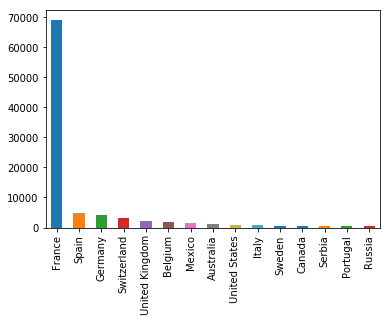

In [105]:
count[0:15].plot.bar()

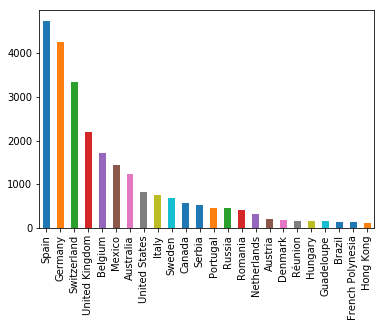

In [106]:
count[1:25].plot.bar()

In [107]:
dico = count.index
print(dico)
dico = dico.to_frame()
print(dico.head())
print(dico.shape) # 253

Index(['France', 'Spain', 'Germany', 'Switzerland', 'United Kingdom',
       'Belgium', 'Mexico', 'Australia', 'United States', 'Italy',
       ...
       'Guinea', 'Tanzania', 'Namibia', 'Kuala-lumpur',
       'Virgin Islands of the United States', 'Other-日本', 'Quebec-canada',
       'Maldives', 'Tschechien', 'Dubai'],
      dtype='object', length=253)
                             0
France                  France
Spain                    Spain
Germany                Germany
Switzerland        Switzerland
United Kingdom  United Kingdom
(253, 1)


In [108]:
#
#dico.index.names = ['destination']
#dico.set_index('index')
#dico['destination'] = dico[0]
#dico.rename(columns={0: 'destination'})
dico.columns = ['destination']
dico.head()

,destination
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom


In [109]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=5)
#df['location'] = df['name'].apply(geocode)

In [110]:
print(geolocator.geocode('France'))
#geolocator.geocode('Canada')
#geolocator.geocode('united-kingdom')
#geolocator.geocode('United Kingdom')
#geolocator.geocode('belgien')
#geolocator.geocode('brossard-quebec')
#geolocator.geocode('etats-unis')
#geolocator.geocode('United States')
print(geolocator.geocode('Algeria'))
print(geolocator.geocode('India'))

France métropolitaine, France
ⵍⵣⵣⴰⵢⴻⵔ الجزائر
India


In [111]:
geolocator.geocode('Algeria')
# give an output that have to be read from right to left !!

Location(ⵍⵣⵣⴰⵢⴻⵔ الجزائر, (28.0000272, 2.9999825, 0.0))

In [112]:
geolocator.geocode('India')

Location(India, (22.3511148, 78.6677428, 0.0))

In [113]:
#geolocator.geocode('fr:Suisse-valais')
geolocator.geocode('Suisse-valais')
# remove fr: or xx: before coutry (here fr:Suisse-valais is not recognized)

Location(Valais/Wallis, Schweiz/Suisse/Svizzera/Svizra, (46.2303063, 7.6605757, 0.0))

In [114]:
#geolocator.geocode('nl:France-others')
#geolocator.geocode('France-others')

#geolocator.geocode('fr:Leclerc-bois-d-arcy-france')
geolocator.geocode('Leclerc-bois-d-arcy-france')

In [115]:
#geolocator.geocode('fr:Grande-bretagne-uk')
geolocator.geocode('Grande-bretagne-uk')

#geolocator.geocode('fr:Polyensie-francaise')
geolocator.geocode('Polyensie-francaise')

In [120]:
# tests
geolocator.geocode('es:Vereinigtes-konigreich ')
geolocator.geocode('Sint Maarten')

Location(Sint Maarten, Nederland, (18.0423736, -63.0549948, 0.0))

In [117]:
# the gecode function will take approximatively 5 min to compute (1 sec between each request)

In [118]:
dico

,destination
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom


In [124]:
dico['Coord'] = dico['destination'].apply(lambda x: geocode(x))

KeyboardInterrupt: 

In [121]:
dico_save = dico

In [122]:
dico['Point'] = dico['Coord'].apply(lambda x: tuple(x.point) if x else None)
dico['Coord_x'] = dico['Point'].apply(lambda x: x[0] if x else None)
dico['Coord_y'] = dico['Point'].apply(lambda x: x[1] if x else None)

KeyError: 'Coord'

In [123]:
dico

,destination
France,France
Spain,Spain
Germany,Germany
Switzerland,Switzerland
United Kingdom,United Kingdom
Belgium,Belgium
Mexico,Mexico
Australia,Australia
United States,United States
Italy,Italy


In [32]:
dico.shape

(294, 5)

In [33]:
dico.to_csv('Destination-Coordinate.csv')

## Distance computation

In [128]:
import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

In [129]:
geopy.distance.vincenty(coords_1, coords_2).km

279.35290160386563